# Mini Project Income - Pipeline Interactivo
Este notebook te permite ejecutar paso a paso el flujo del proyecto, importando los módulos desde `src/`.

In [1]:
import sys
sys.path.append("../")  # Asegura que Python encuentre los módulos en ../src

from src.config import config
from src import (
    load_validate,
    target_processing,
    cleaning,
    eda,
    feature_engineering,
    split,
    pipeline,
    experiment
)


## 1. Carga y Validación Inicial

In [2]:
df = load_validate.load_dataset(config["path"])
df = load_validate.validate_structure(df, config["expected_columns"])
load_validate.quick_explore(df)
load_validate.check_nulls_duplicates(df)


[INFO] Dataset cargado correctamente desde data/adult.csv con shape (32561, 15)
[INFO] Columnas finales en el DataFrame: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
[INFO] Resumen rápido del dataset:
 - Shape: (32561, 15)
 - Nulos por columna: {'age': 0, 'workclass': 1836, 'fnlwgt': 0, 'education': 0, 'education.num': 0, 'marital.status': 0, 'occupation': 1843, 'relationship': 0, 'race': 0, 'sex': 0, 'capital.gain': 0, 'capital.loss': 0, 'hours.per.week': 0, 'native.country': 583, 'income': 0}
 - Únicos por columna: {'age': 73, 'workclass': 8, 'fnlwgt': 21648, 'education': 16, 'education.num': 16, 'marital.status': 7, 'occupation': 14, 'relationship': 6, 'race': 5, 'sex': 2, 'capital.gain': 119, 'capital.loss': 92, 'hours.per.week': 94, 'native.country': 41, 'income': 2}
[INFO] Nulos por columna: {'age': 0, 'workclass': 1836, 'fnl

{'nans_per_col': {'age': 0,
  'workclass': 1836,
  'fnlwgt': 0,
  'education': 0,
  'education.num': 0,
  'marital.status': 0,
  'occupation': 1843,
  'relationship': 0,
  'race': 0,
  'sex': 0,
  'capital.gain': 0,
  'capital.loss': 0,
  'hours.per.week': 0,
  'native.country': 583,
  'income': 0},
 'total_duplicates': np.int64(24)}

## 2. Procesamiento del Target

[INFO] Target 'income' normalizado. Valores fuera de ['<=50K', '>50K']: 0
[INFO] Target codificado correctamente ({'<=50K': 0, '>50K': 1})


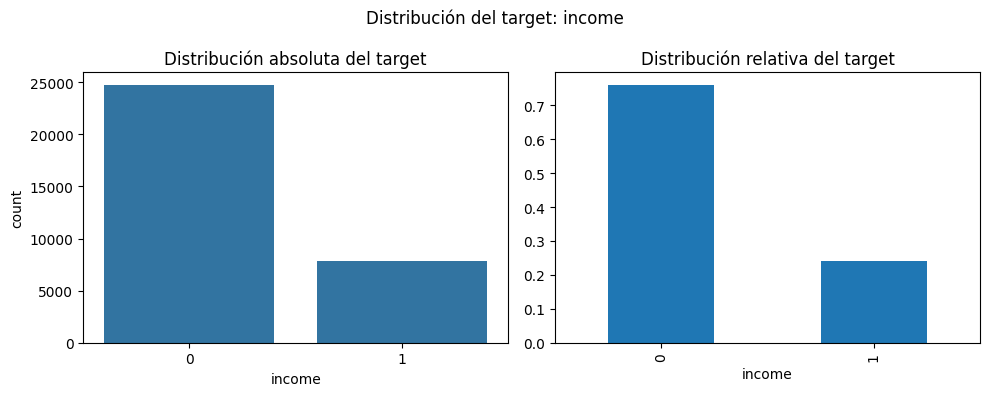

[INFO] Visualización de distribución de clases mostrada.
[INFO] Estado post-limpieza del target 'income':
  - Shape actual: (32561, 15)
  - Valores codificados: {np.int64(0): 24720, np.int64(1): 7841}
  - Filas eliminadas/cambiadas: 0


In [3]:
df = target_processing.clean_normalize_target(df, config["target"])
df = target_processing.encode_target(df, config["target"], config["target_mapping"])
target_processing.plot_target_distribution(df, config["target"])
removed_rows = df[config["target"]].isna().sum()
target_processing.log_target_status(df, config["target"], removed_rows)


## 3. Limpieza General

In [4]:
df, _ = cleaning.drop_duplicates(df)
cleaning.analyze_missing_values(df, config["target"])
df = cleaning.fix_column_types_and_formats(df)
cleaning.detect_gross_outliers(df, config["num_features"])


[INFO] Duplicados eliminados: 24 (shape final: (32537, 15))
[INFO] Nulos por columna: {'age': 0, 'workclass': 1836, 'fnlwgt': 0, 'education': 0, 'education.num': 0, 'marital.status': 0, 'occupation': 1843, 'relationship': 0, 'race': 0, 'sex': 0, 'capital.gain': 0, 'capital.loss': 0, 'hours.per.week': 0, 'native.country': 582, 'income': 0}
[INFO] Total nulos en dataset: 4261
[INFO] Nulos en target: 0
[INFO] Tipos y formatos corregidos para columnas relevantes.
[INFO] Columna 'age': min=17, max=90, valores negativos=0
[INFO] Columna 'education.num': min=1, max=16, valores negativos=0
[INFO] Columna 'capital.gain': min=0, max=99999, valores negativos=0
[INFO] Columna 'capital.loss': min=0, max=4356, valores negativos=0
[INFO] Columna 'hours.per.week': min=1, max=99, valores negativos=0


{'age': {'min': np.int64(17), 'max': np.int64(90), 'n_negative': 0},
 'education.num': {'min': np.int64(1), 'max': np.int64(16), 'n_negative': 0},
 'capital.gain': {'min': np.int64(0), 'max': np.int64(99999), 'n_negative': 0},
 'capital.loss': {'min': np.int64(0), 'max': np.int64(4356), 'n_negative': 0},
 'hours.per.week': {'min': np.int64(1), 'max': np.int64(99), 'n_negative': 0}}

## 4. Análisis Exploratorio de Datos (EDA)

[INFO] Estadísticos descriptivos (numéricas):
                  count         mean          std   min   25%   50%   75%  \
age             32537.0    38.585549    13.637984  17.0  28.0  37.0  48.0   
education.num   32537.0    10.081815     2.571633   1.0   9.0  10.0  12.0   
capital.gain    32537.0  1078.443741  7387.957424   0.0   0.0   0.0   0.0   
capital.loss    32537.0    87.368227   403.101833   0.0   0.0   0.0   0.0   
hours.per.week  32537.0    40.440329    12.346889   1.0  40.0  40.0  45.0   

                    max  
age                90.0  
education.num      16.0  
capital.gain    99999.0  
capital.loss     4356.0  
hours.per.week     99.0  
[INFO] Estadísticos descriptivos (categóricas):
              col  n_unique           most_freq  freq_most_freq  \
0       workclass         9             Private           22673   
1  marital.status         7  Married-civ-spouse           14970   
2      occupation        15      Prof-specialty            4136   
3    relationship  

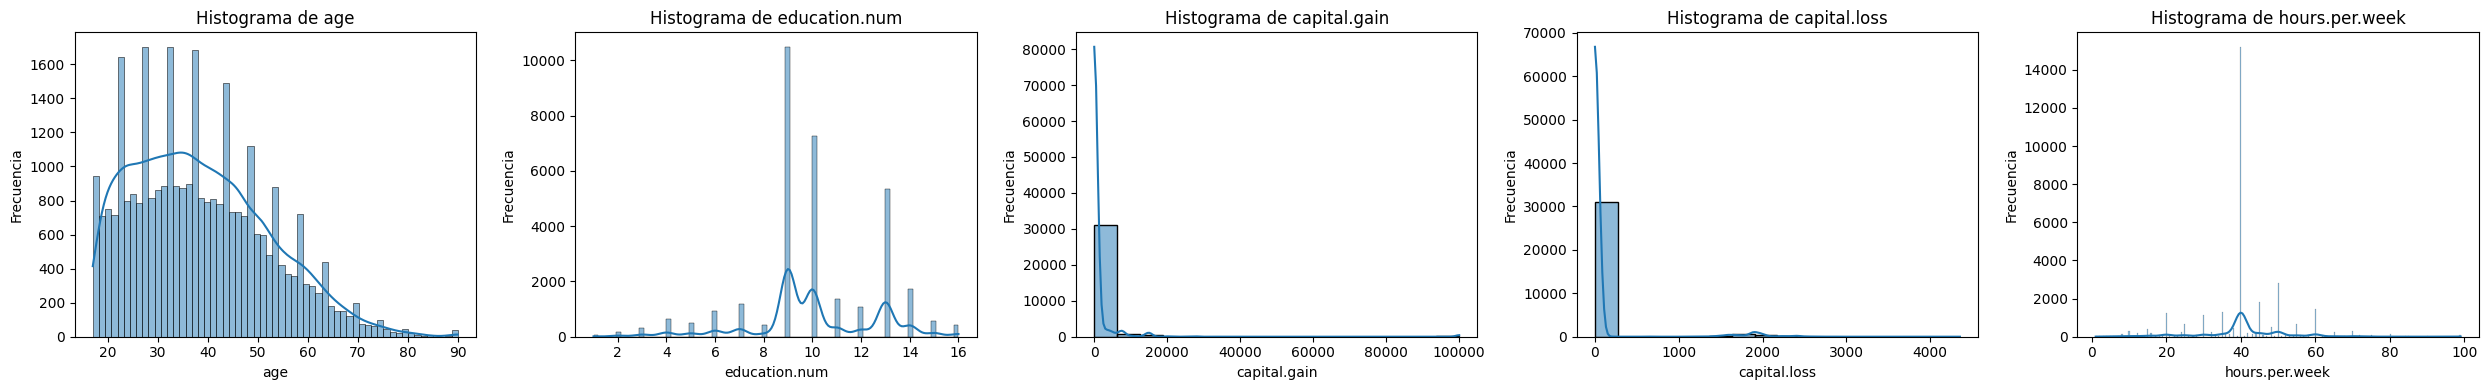

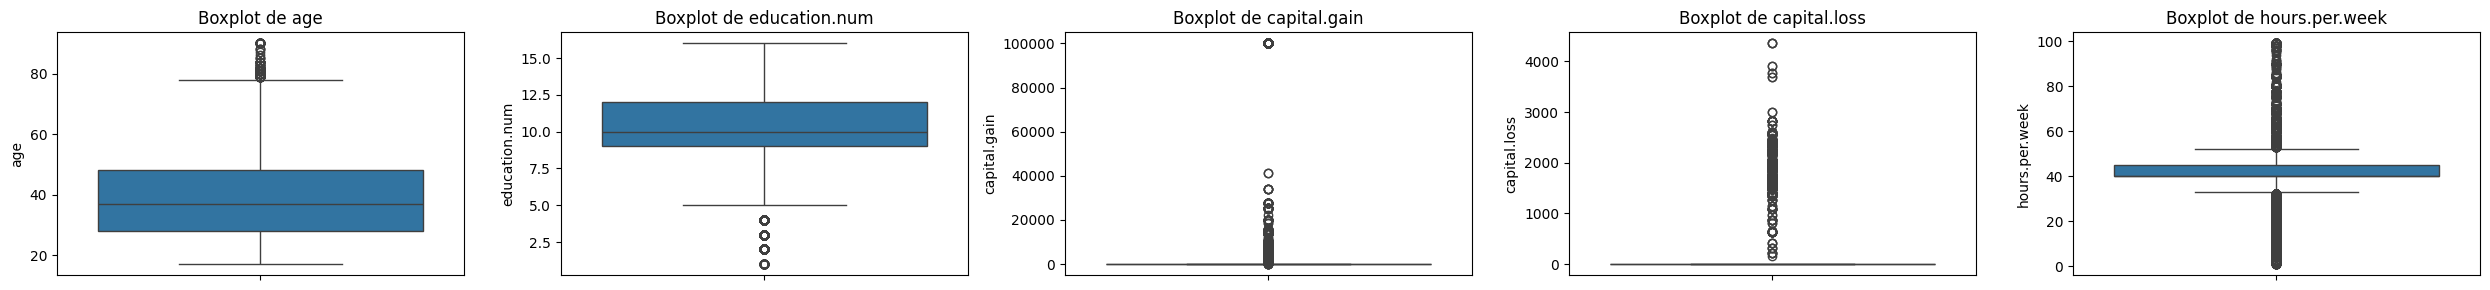

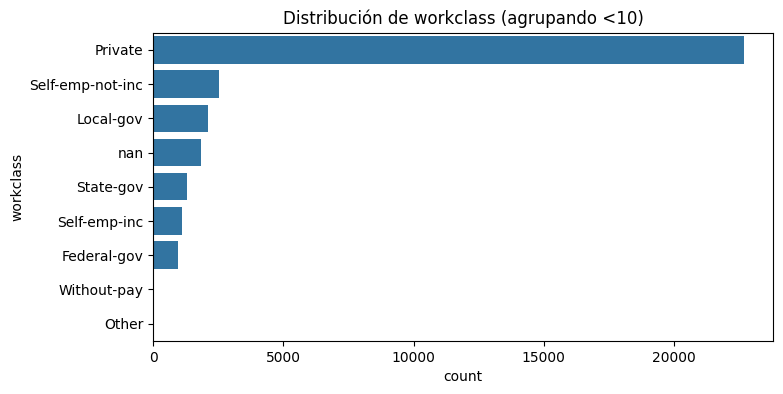

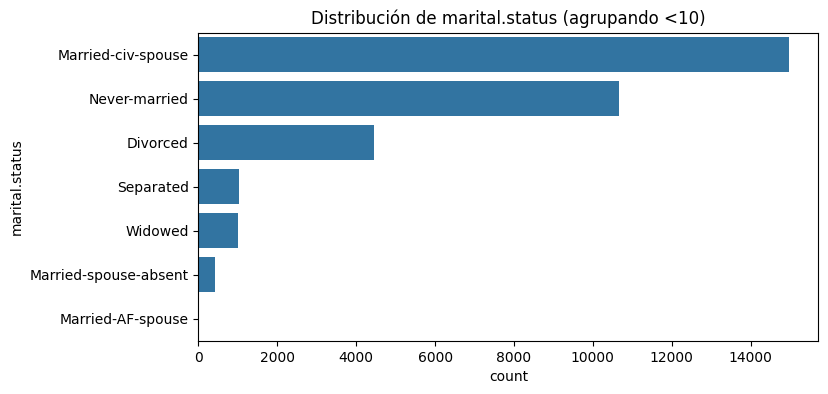

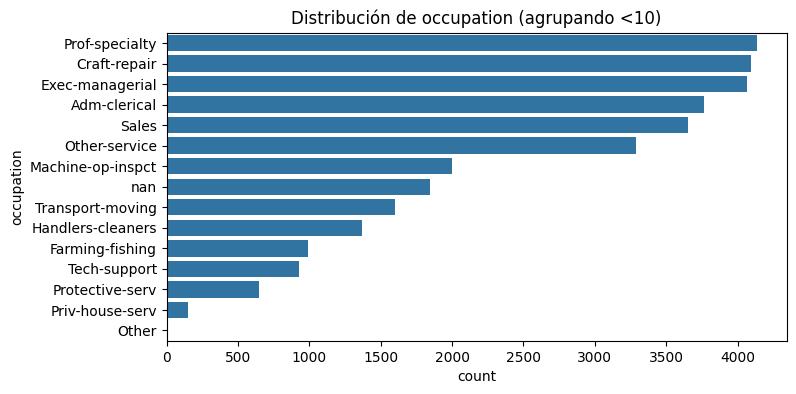

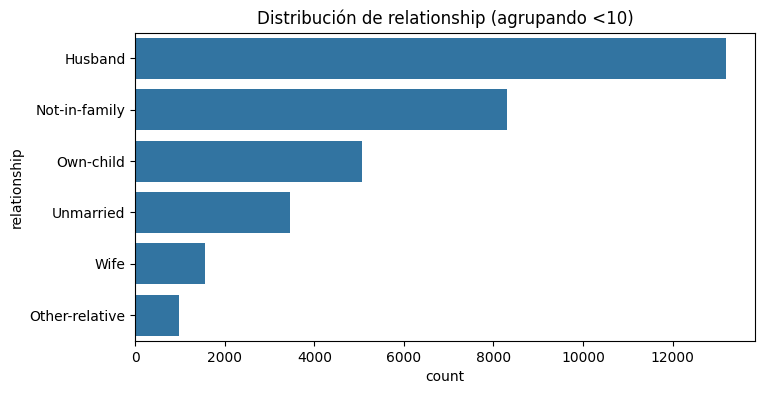

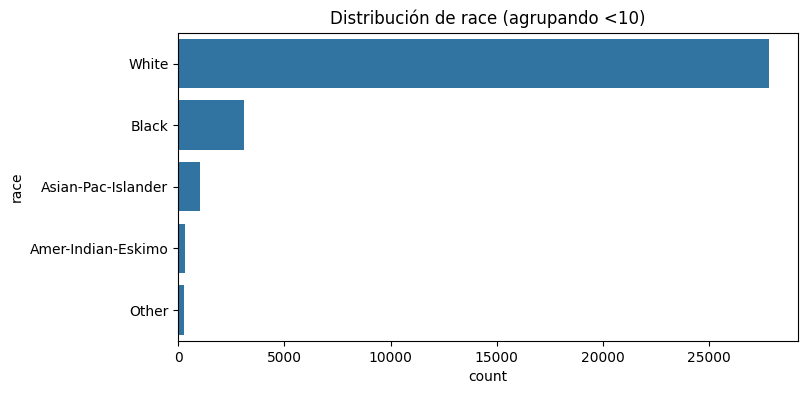

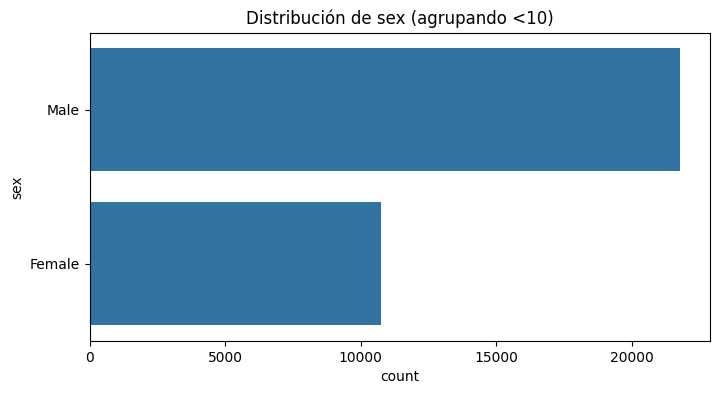

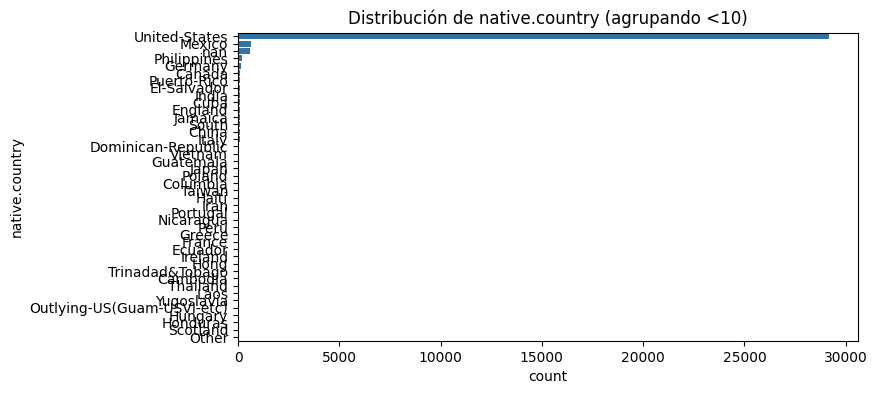

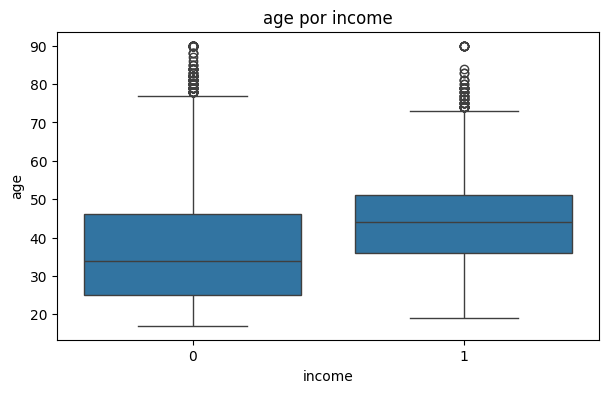

<Figure size 700x400 with 0 Axes>

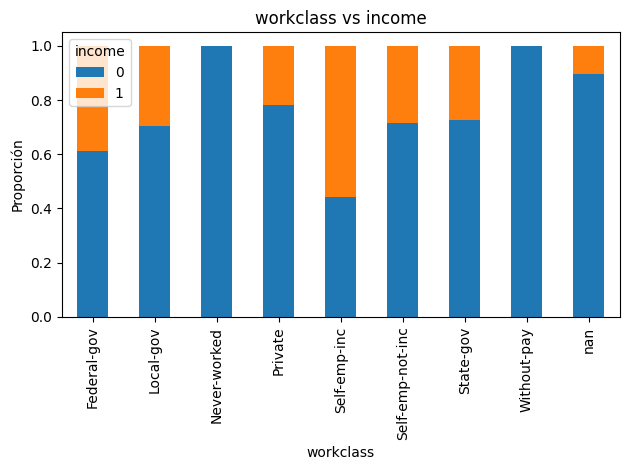

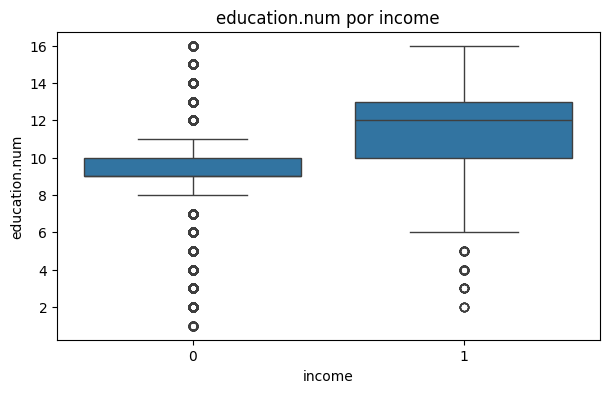

<Figure size 700x400 with 0 Axes>

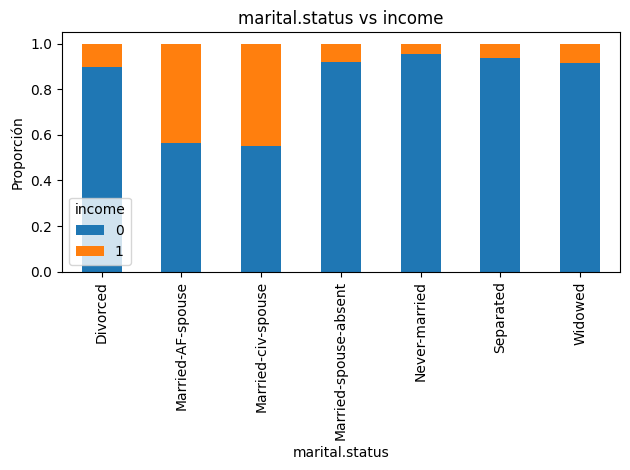

<Figure size 700x400 with 0 Axes>

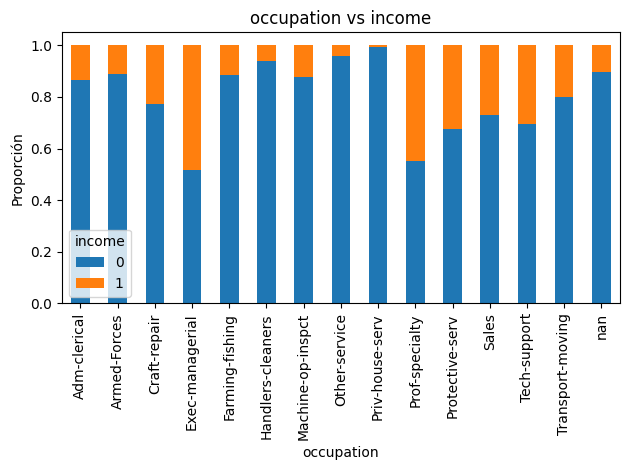

<Figure size 700x400 with 0 Axes>

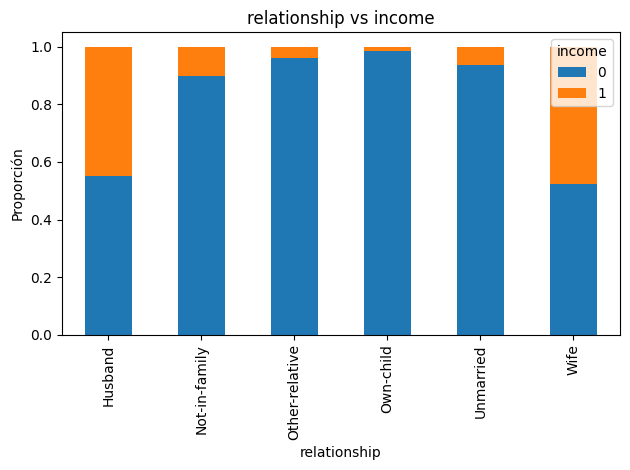

<Figure size 700x400 with 0 Axes>

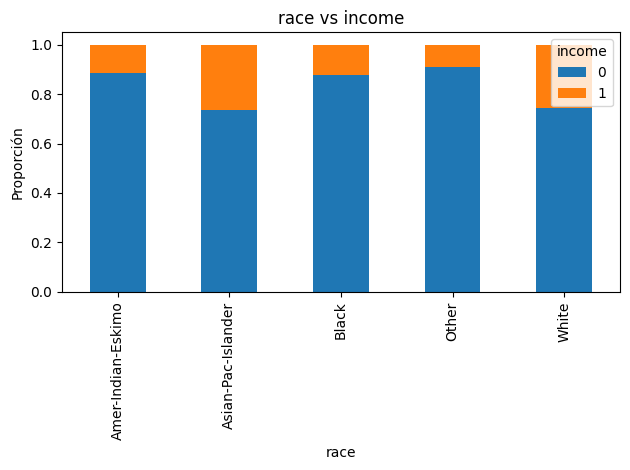

<Figure size 700x400 with 0 Axes>

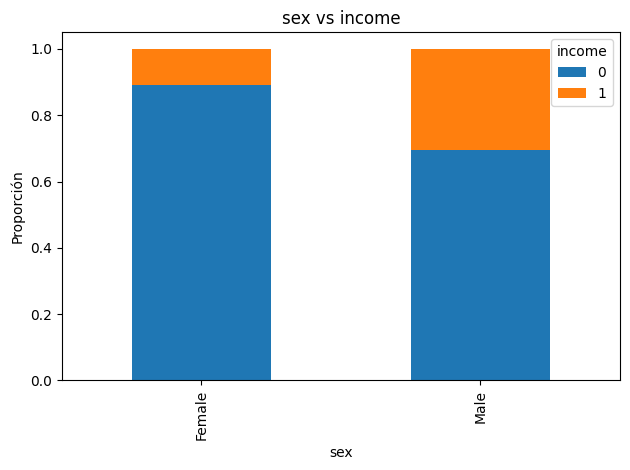

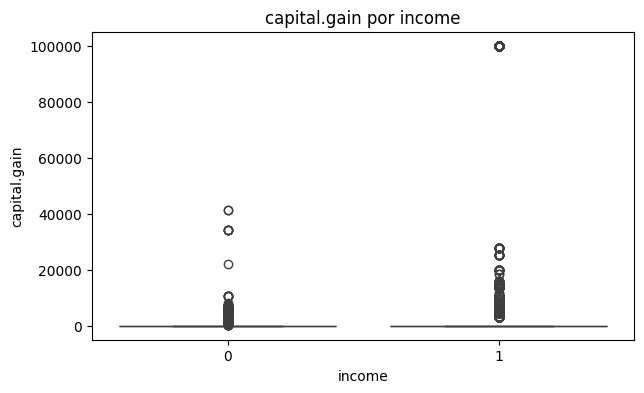

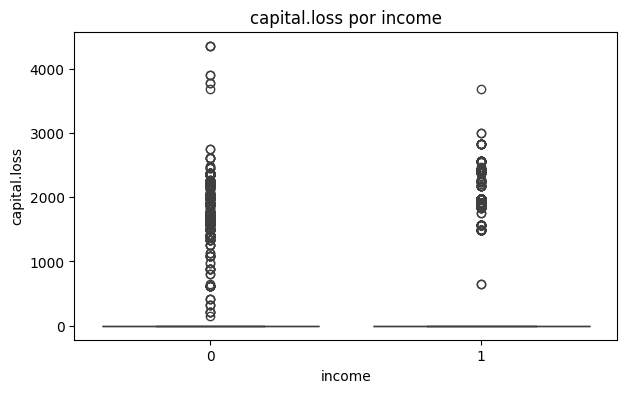

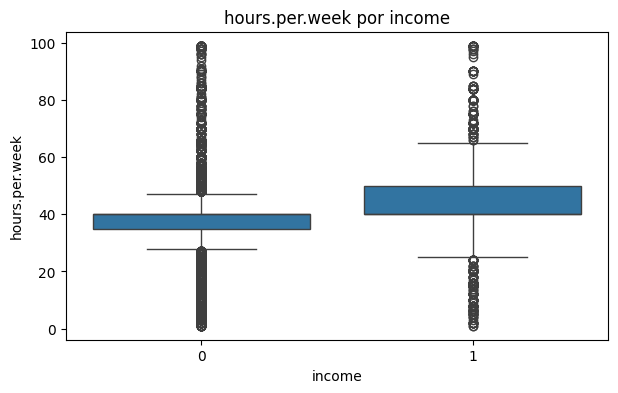

<Figure size 700x400 with 0 Axes>

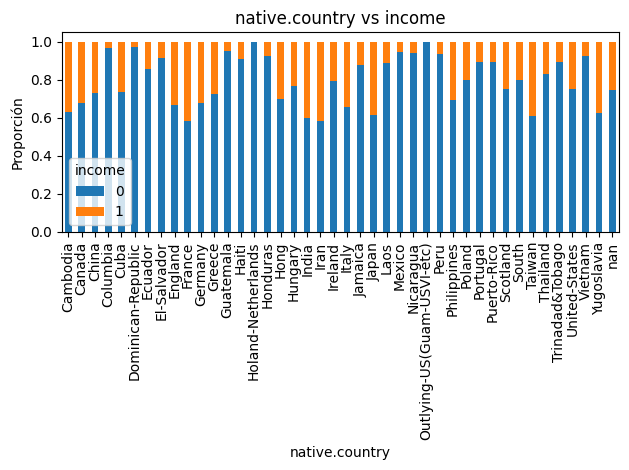

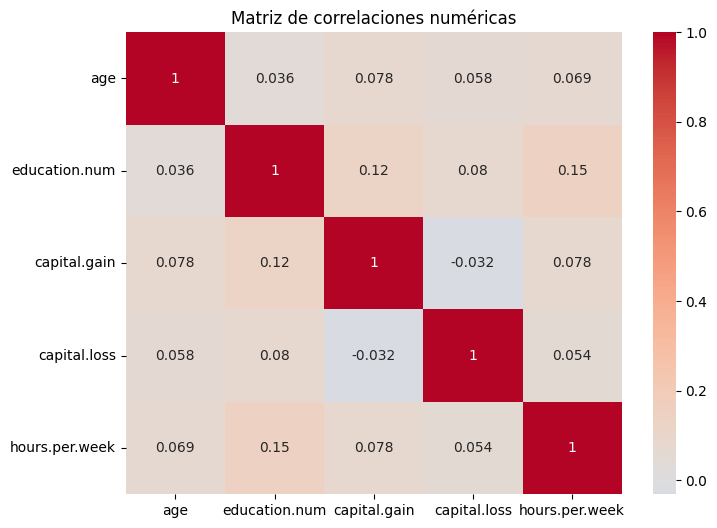

[INFO] Pares de features con |correlación| > 0.95: {}


{}

In [5]:
eda.describe_numerical(df, config["num_features"])
eda.describe_categorical(df, config["cat_features"])
eda.plot_numerical_distributions(df, config["num_features"])
eda.plot_categorical_distributions(df, config["cat_features"], min_freq=10)
eda.plot_feature_target_relationship(df, config["features"], config["target"])
corr = eda.correlation_analysis(df, config["num_features"])
eda.analyze_feature_redundancy(df, config["num_features"])


## 5. Ingeniería y Selección de Features

In [5]:
features_dict = feature_engineering.prepare_final_features(df, config["drop_features"], config["target"])
feature_engineering.collect_pipeline_issues(df, features_dict)
feature_engineering.save_feature_config(features_dict, "features_config.json")


[INFO] Features finales para modelado: {'final_features': ['age', 'workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'], 'final_num_features': ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'], 'final_cat_features': ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']}
[INFO] Problemas/preprocesamientos detectados para el pipeline: {'native.country': {'high_cardinality': 42}}
[INFO] Configuración de features guardada en features_config.json


## 6. División de Datos

In [6]:
X, y = split.prepare_X_y(df, features_dict, config["target"])
splits = split.stratified_train_test_split(X, y)
split.check_split_quality(splits["y_train"], splits["y_test"])


[INFO] Matriz X preparada (shape: (32537, 12)), vector y (shape: (32537,))
[INFO] Split estratificado hecho. X_train: (26029, 12), X_test: (6508, 12)
[INFO] Distribución de clases (train): {np.int64(0): 0.7590764147681432, np.int64(1): 0.24092358523185678}
[INFO] Distribución de clases (test): {np.int64(0): 0.7590657652120467, np.int64(1): 0.24093423478795328}


{'train_dist': {np.int64(0): 0.7590764147681432,
  np.int64(1): 0.24092358523185678},
 'test_dist': {np.int64(0): 0.7590657652120467,
  np.int64(1): 0.24093423478795328},
 'n_train': 26029,
 'n_test': 6508,
 'n_train_null': np.int64(0),
 'n_test_null': np.int64(0)}

## Auditoría

In [ ]:
import sys
sys.path.append('src')

import pandas as pd
from pipeline import make_pipeline_for_experiment

# 1. Construye el pipeline con el config y features_dict actuales
pipe = make_pipeline_for_experiment(config, features_dict)

# 2. Audita NaNs tras el preprocesamiento (para el pipeline por defecto)
X_prep = pipe.named_steps['preprocessing'].fit_transform(splits["X_train"])
n_nans_total = pd.DataFrame(X_prep).isnull().sum().sum()
print(f"NaNs tras pipeline (default config): {n_nans_total}")
assert n_nans_total == 0, "¡Hay NaNs en X_train tras pipeline default!"

# 3. Audita escapes de NaNs para CADA combinación del último param_grid relevante
from sklearn.model_selection import ParameterGrid

param_grid = {
    "preprocessing__cat_workclass__grouper__min_freq": [1000, 3000],
    "preprocessing__cat_occupation__grouper__min_freq": [500, 2000],
    "preprocessing__cat_relationship__grouper__min_freq": [1000, 4000],
    "preprocessing__cat_race__grouper__min_freq": [500, 1000],
    "preprocessing__cat_native.country__grouper__min_freq": [100, 1000],
    "model__C": [0.01, 0.1, 1],
    "preprocessing__num__outlier__strategy": ["clip"],
}

param_combos = list(ParameterGrid(param_grid))

n_combos = len(param_combos)
print(f"Auditoría de NaNs en {n_combos} combinaciones de hiperparámetros...")

errores = []

for i, params in enumerate(param_combos):
    try:
        pipe.set_params(**params)
        X_prep = pipe.named_steps['preprocessing'].fit_transform(splits["X_train"])
        n_nans = pd.DataFrame(X_prep).isnull().sum().sum()
        if n_nans > 0:
            errores.append((i, params, n_nans))
            print(f"[ERROR] {n_nans} NaNs con params: {params}")
    except Exception as e:
        errores.append((i, params, f"EXCEPTION: {e}"))
        print(f"[EXCEPTION] en combinación {i}: {e}")

if not errores:
    print("¡No se detectaron NaNs ni excepciones en ninguna combinación del gridsearch! 🚦")
else:
    print("\n--- RESUMEN DE ERRORES ---")
    for i, params, issue in errores:
        print(f"Combinación {i} ({params}) -> {issue}")



[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: LogisticRegression
NaNs tras pipeline (default config): 0
Auditoría de NaNs en 486 combinaciones de hiperparámetros...
¡No se detectaron NaNs ni excepciones en ninguna combinación del gridsearch! 🚦


## 7. Pipeline + Experimento con MLflow

In [8]:
pipe = pipeline.make_pipeline_for_experiment(config, features_dict)

param_grid = {
    "model__C": [0.1, 1, 10],
    "preprocessing__num__outlier__strategy": ["clip", "none"]
}

experiment.setup_mlflow_experiment(
    tracking_uri=config["mlflow"]["tracking_uri"],
    experiment_name=config["mlflow"]["experiment_name"]
)

experiment.run_gridsearch_experiment(
    pipe, param_grid,
    splits["X_train"], splits["y_train"],
    splits["X_test"], splits["y_test"],
    scoring="accuracy",
    out_dir="results_out",
    tags={"proyecto": "miniproject_adult_income1", "autor": "Javier"}
)


[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: RandomForestClassifier
[INFO] MLflow configurado: file:./mlruns, experimento: Testeando


2025/05/30 17:41:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/javs/anaconda3/envs/mlflow_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 6 candidates, totalling 30 fits


ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
## GROUPING TUNE EXPERIMENT

import pandas as pd
import os
import sys
sys.path.append('src')
from pipeline import make_pipeline_for_experiment  # o desde tu namespace, según estés trabajando
from experiment import setup_mlflow_experiment, run_gridsearch_experiment
from sklearn.model_selection import GridSearchCV

# 1. Construye el pipeline actual con el config y features_dict
pipe = make_pipeline_for_experiment(config, features_dict)

# 2. Define el param_grid SOLO con min_freq relevantes
param_grid = {
    "preprocessing__cat_workclass__grouper__min_freq": [3000, 5000],
    "preprocessing__cat_occupation__grouper__min_freq": [1500, 4000],
    "preprocessing__cat_relationship__grouper__min_freq": [4000, 8000],
    "preprocessing__cat_race__grouper__min_freq": [4000, 5000],
    "preprocessing__cat_native.country__grouper__min_freq": [500, 1000],
    "model__C": [0.01, 0.1, 1],
    "preprocessing__num__outlier__strategy": ["clip"],  # fijo porque ya lo probaste
}

# 3. Setup de MLflow para este experimento
setup_mlflow_experiment(
    tracking_uri=config["mlflow"]["tracking_uri"],
    experiment_name=config["mlflow"]["experiment_name"] + "_grouping_tune"
)

# 4. Lanza el GridSearch y guarda resultados completos (esto también trackea en MLflow)
# Guardamos el GridSearch para poder inspeccionar los resultados luego:

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
)
grid.fit(splits["X_train"], splits["y_train"])

# 5. Registramos, para cada combinación, cuántas categorías quedan en cada variable agrupada
results = []
for i, params in enumerate(grid.cv_results_['params']):
    row = params.copy()
    # Creamos el pipeline con estos params específicos
    pipe.set_params(**params)
    # Fit solo en train para ver los grouper resultantes
    pipe.fit(splits["X_train"], splits["y_train"])
    # Extraemos el CategoryGrouper de cada variable y contamos cuántas categorías sobrevivieron
    for cat in ['workclass', 'occupation', 'relationship', 'race', 'native.country']:
        try:
            grouper = pipe.named_steps['preprocessing'].named_transformers_[f'cat_{cat}'].named_steps['grouper']
            n_cats = len(grouper.major_cats_)  # Categorías que quedan (no agrupadas como Other)
            row[f"{cat}_n_cats"] = n_cats + 1  # +1 por el grupo 'Other'
        except Exception as e:
            row[f"{cat}_n_cats"] = "N/A"
    results.append(row)

# 6. Guardamos y mostramos la tabla interpretativa
os.makedirs("results_out_grouping", exist_ok=True)
df_grouping_results = pd.DataFrame(results)
df_grouping_results.to_csv("results_out_grouping/minfreq_category_counts.csv", index=False)
print("Tabla de combinaciones de min_freq y número de categorías finales por variable:")
display(df_grouping_results)

# 7. (Opcional) Si quieres también registrar la mejor combinación encontrada:
print("\nMejor combinación encontrada (según score):")
print(grid.best_params_)


[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: LogisticRegression
[INFO] MLflow configurado: file:./mlruns, experimento: Testeando_grouping_tune
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END model__C=0.01, preprocessing__cat_native.country__grouper__min_freq=500, preprocessing__cat_occupation__grouper__min_freq=1500, preprocessing__cat_race__grouper__min_freq=4000, preprocessing__cat_relationship__grouper__min_freq=4000, preprocessing__cat_workclass__grouper__min_freq=3000, preprocessing__num__outlier__strategy=clip; total time=   0.7s
[CV] END model__C=0.01, preprocessing__cat_native.country__grouper__min_freq=500, preprocessing__cat_occupation__grouper__min_freq=1500, preprocessing__cat_race__grouper__min_freq=4000, preprocessing__cat_relationship__grouper__min_freq=4000, preprocessing__cat_workclass__grouper__min_freq=3000, preprocessing__num__outlier__strategy=clip; total time=   0.7s
[CV] END model__C=0.01, 

,model__C,preprocessing__cat_native.country__grouper__min_freq,preprocessing__cat_occupation__grouper__min_freq,preprocessing__cat_race__grouper__min_freq,preprocessing__cat_relationship__grouper__min_freq,preprocessing__cat_workclass__grouper__min_freq,preprocessing__num__outlier__strategy,workclass_n_cats,occupation_n_cats,relationship_n_cats,race_n_cats,native.country_n_cats
0,0.01,500,1500,4000,4000,3000,clip,2,8,4,2,3
1,0.01,500,1500,4000,4000,5000,clip,2,8,4,2,3
2,0.01,500,1500,4000,8000,3000,clip,2,8,2,2,3
3,0.01,500,1500,4000,8000,5000,clip,2,8,2,2,3
4,0.01,500,1500,5000,4000,3000,clip,2,8,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.00,1000,4000,4000,8000,5000,clip,2,1,2,2,2
92,1.00,1000,4000,5000,4000,3000,clip,2,1,4,2,2
93,1.00,1000,4000,5000,4000,5000,clip,2,1,4,2,2
94,1.00,1000,4000,5000,8000,3000,clip,2,1,2,2,2



Mejor combinación encontrada (según score):
{'model__C': 0.1, 'preprocessing__cat_native.country__grouper__min_freq': 500, 'preprocessing__cat_occupation__grouper__min_freq': 1500, 'preprocessing__cat_race__grouper__min_freq': 4000, 'preprocessing__cat_relationship__grouper__min_freq': 8000, 'preprocessing__cat_workclass__grouper__min_freq': 3000, 'preprocessing__num__outlier__strategy': 'clip'}


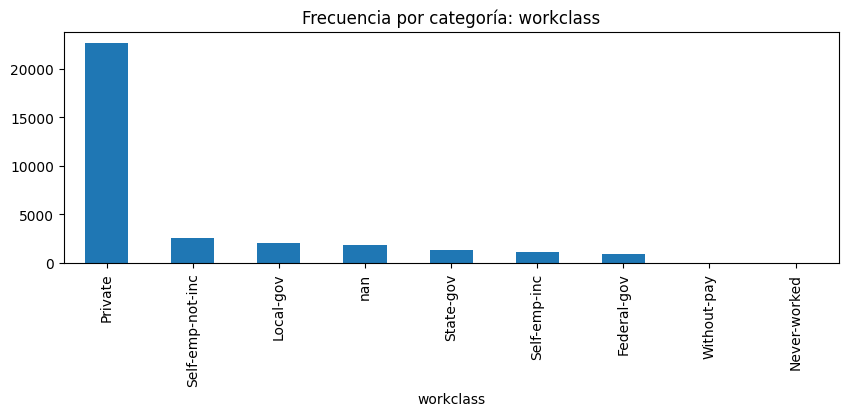

Frecuencias top-10 para workclass:
 workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
nan                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


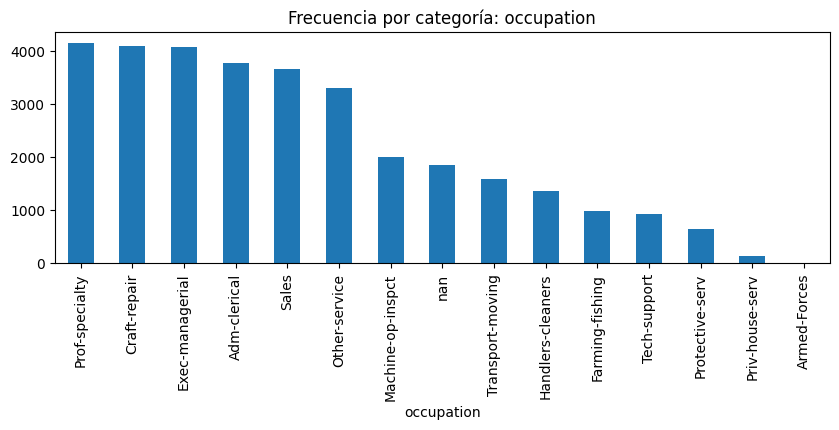

Frecuencias top-10 para occupation:
 occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
nan                  1843
Transport-moving     1597
Handlers-cleaners    1369
Name: count, dtype: int64


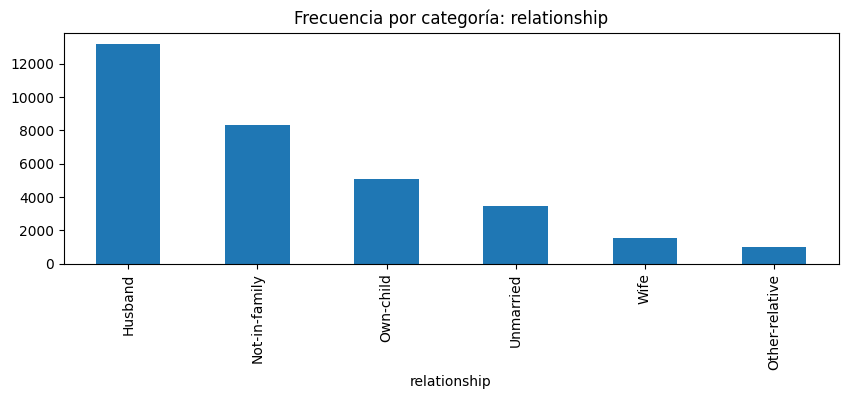

Frecuencias top-10 para relationship:
 relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64


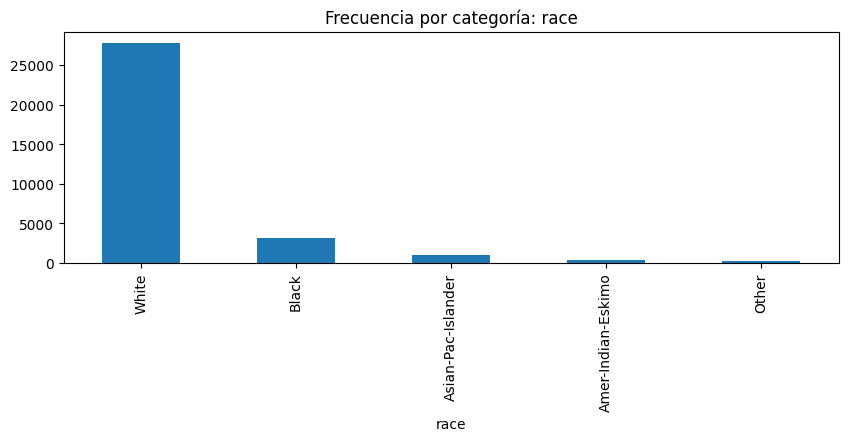

Frecuencias top-10 para race:
 race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


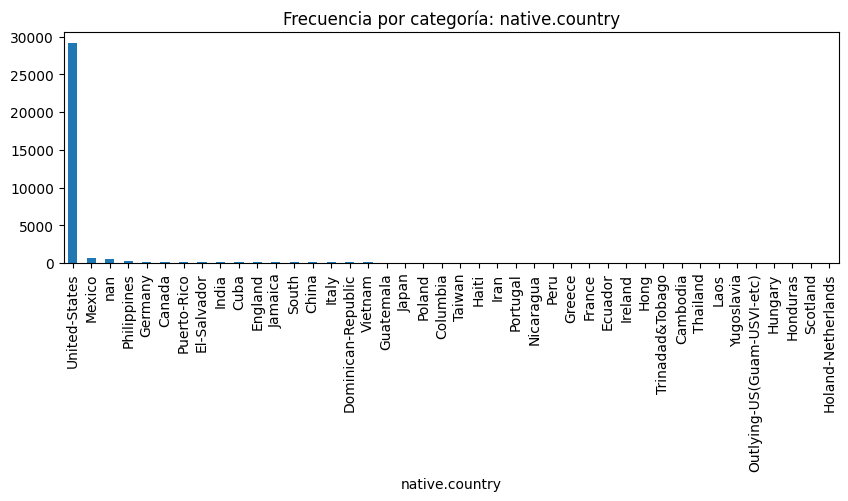

Frecuencias top-10 para native.country:
 native.country
United-States    29153
Mexico             639
nan                582
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt

for col in ["workclass", "occupation", "relationship", "race", "native.country"]:
    freq = df[col].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10,3))
    freq.plot(kind='bar')
    plt.title(f"Frecuencia por categoría: {col}")
    plt.show()
    print(f"Frecuencias top-10 para {col}:\n", freq.head(10))


In [17]:
## GROUPING FINE TUNE EXPERIMENT

import pandas as pd
import os
import sys
sys.path.append('src')
from pipeline import make_pipeline_for_experiment  # o desde tu namespace, según estés trabajando
from experiment import setup_mlflow_experiment, run_gridsearch_experiment
from sklearn.model_selection import GridSearchCV

# 1. Construye el pipeline actual con el config y features_dict
pipe = make_pipeline_for_experiment(config, features_dict)

# 2. Define el param_grid SOLO con min_freq relevantes
param_grid = {
    "preprocessing__cat_workclass__grouper__min_freq": [0, 2000, 3000],
    "preprocessing__cat_occupation__grouper__min_freq": [0, 2000, 4000],
    "preprocessing__cat_relationship__grouper__min_freq": [0, 3000, 8000],
    "preprocessing__cat_race__grouper__min_freq": [0, 1000, 4000],
    "preprocessing__cat_native.country__grouper__min_freq": [0, 500, 1000],
    "model__C": [0.01, 0.1, 1],
    "preprocessing__num__outlier__strategy": ["clip"]
    
}

# 3. Setup de MLflow para este experimento
setup_mlflow_experiment(
    tracking_uri=config["mlflow"]["tracking_uri"],
    experiment_name=config["mlflow"]["experiment_name"] + "_grouping_fine_tune"
)

# 4. Lanza el GridSearch y guarda resultados completos (esto también trackea en MLflow)
# Guardamos el GridSearch para poder inspeccionar los resultados luego:

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
)
grid.fit(splits["X_train"], splits["y_train"])

# 5. Registramos, para cada combinación, cuántas categorías quedan en cada variable agrupada
results = []
for i, params in enumerate(grid.cv_results_['params']):
    row = params.copy()
    # Creamos el pipeline con estos params específicos
    pipe.set_params(**params)
    # Fit solo en train para ver los grouper resultantes
    pipe.fit(splits["X_train"], splits["y_train"])
    # Extraemos el CategoryGrouper de cada variable y contamos cuántas categorías sobrevivieron
    for cat in ['workclass', 'occupation', 'relationship', 'race', 'native.country']:
        try:
            grouper = pipe.named_steps['preprocessing'].named_transformers_[f'cat_{cat}'].named_steps['grouper']
            n_cats = len(grouper.major_cats_)  # Categorías que quedan (no agrupadas como Other)
            row[f"{cat}_n_cats"] = n_cats + 1  # +1 por el grupo 'Other'
        except Exception as e:
            row[f"{cat}_n_cats"] = "N/A"
    results.append(row)

# 6. Guardamos y mostramos la tabla interpretativa
os.makedirs("results_out_grouping", exist_ok=True)
df_grouping_results = pd.DataFrame(results)
df_grouping_results.to_csv("results_out_grouping/minfreq_category_counts.csv", index=False)
print("Tabla de combinaciones de min_freq y número de categorías finales por variable:")
display(df_grouping_results)

# 7. (Opcional) Si quieres también registrar la mejor combinación encontrada:
print("\nMejor combinación encontrada (según score):")
print(grid.best_params_)


[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: LogisticRegression
[INFO] MLflow configurado: file:./mlruns, experimento: Testeando_grouping_fine_tune
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END model__C=0.01, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=0, preprocessing__num__outlier__strategy=clip; total time=   0.9s
[CV] END model__C=0.01, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=2000, preprocessing__num__outlier__strategy=clip; total time=   0.9s
[CV] END model__C=0.01, preprocessing__cat

,model__C,preprocessing__cat_native.country__grouper__min_freq,preprocessing__cat_occupation__grouper__min_freq,preprocessing__cat_race__grouper__min_freq,preprocessing__cat_relationship__grouper__min_freq,preprocessing__cat_workclass__grouper__min_freq,preprocessing__num__outlier__strategy,workclass_n_cats,occupation_n_cats,relationship_n_cats,race_n_cats,native.country_n_cats
0,0.01,0,0,0,0,0,clip,10,16,7,6,42
1,0.01,0,0,0,0,2000,clip,3,16,7,6,42
2,0.01,0,0,0,0,3000,clip,2,16,7,6,42
3,0.01,0,0,0,3000,0,clip,10,16,4,6,42
4,0.01,0,0,0,3000,2000,clip,3,16,4,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...
724,1.00,1000,4000,4000,3000,2000,clip,3,1,4,2,2
725,1.00,1000,4000,4000,3000,3000,clip,2,1,4,2,2
726,1.00,1000,4000,4000,8000,0,clip,10,1,2,2,2
727,1.00,1000,4000,4000,8000,2000,clip,3,1,2,2,2



Mejor combinación encontrada (según score):
{'model__C': 0.1, 'preprocessing__cat_native.country__grouper__min_freq': 0, 'preprocessing__cat_occupation__grouper__min_freq': 0, 'preprocessing__cat_race__grouper__min_freq': 0, 'preprocessing__cat_relationship__grouper__min_freq': 0, 'preprocessing__cat_workclass__grouper__min_freq': 0, 'preprocessing__num__outlier__strategy': 'clip'}


In [21]:
import sys
sys.path.append('src')

from pipeline import make_pipeline_for_experiment
from experiment import setup_mlflow_experiment
import os

# 1. Define una grilla *afinada* para cada categórica
param_grid = {
    # Elije solo valores de min_freq que cambian efectivamente la granularidad según EDA
    "preprocessing__cat_workclass__grouper__min_freq": [0, 2000],     # Deja todas o solo las 3 principales
    "preprocessing__cat_occupation__grouper__min_freq": [0, 2000, 4000], # Pasa de muchas clases, a 7, a 4
    "preprocessing__cat_relationship__grouper__min_freq": [0, 3000],  # Deja todas o solo las 3 mayores
    "preprocessing__cat_race__grouper__min_freq": [0, 1000],          # “White”, “Black” o todas
    "preprocessing__cat_native.country__grouper__min_freq": [0, 500], # “US” vs resto o todas
    "model__C": [0.1],                                                # Mejor valor encontrado
    "preprocessing__num__outlier__strategy": ["clip"],                # Mejor valor encontrado
}

# 2. Construye el pipeline con el config y features actuales
pipe = make_pipeline_for_experiment(config, features_dict)

# 3. Prepara la carpeta de resultados (por si no existe)
os.makedirs("results_out_finetuned", exist_ok=True)

# 4. Setup MLflow para este experimento afinado
setup_mlflow_experiment(
    tracking_uri=config["mlflow"]["tracking_uri"],
    experiment_name=config["mlflow"]["experiment_name"] + "_finetuned"
)

# 5. Corre el experimento
run_gridsearch_experiment(
    pipe, param_grid,
    splits["X_train"], splits["y_train"],
    splits["X_test"], splits["y_test"],
    scoring="accuracy",           # Puedes probar con 'f1' o 'roc_auc' si tienes interés en la clase minoritaria
    out_dir="results_out_finetuned",
    tags={
        "proyecto": "miniproject_adult_income",
        "autor": "Javier",
        "experimento": "finetuned_grouping_onehot"
    }
)


2025/05/30 17:26:42 INFO mlflow.tracking.fluent: Experiment with name 'Testeando_finetuned' does not exist. Creating a new experiment.


[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: LogisticRegression
[INFO] MLflow configurado: file:./mlruns, experimento: Testeando_finetuned


2025/05/30 17:26:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/javs/anaconda3/envs/mlflow_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__C=0.1, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=0, preprocessing__num__outlier__strategy=clip; total time=   1.7s
[CV] END model__C=0.1, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=2000, preprocessing__num__outlier__strategy=clip; total time=   1.9s
[CV] END model__C=0.1, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing_

2025/05/30 17:27:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/javs/anaconda3/envs/mlflow_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/05/30 17:28:03 INFO mlflow.sklearn.utils: Logging the 5 best runs, 43 runs will be omitted.


[INFO] Mejor score (cv): 0.8517423589053198
[INFO] Mejores hiperparámetros: {'model__C': 0.1, 'preprocessing__cat_native.country__grouper__min_freq': 0, 'preprocessing__cat_occupation__grouper__min_freq': 0, 'preprocessing__cat_race__grouper__min_freq': 0, 'preprocessing__cat_relationship__grouper__min_freq': 0, 'preprocessing__cat_workclass__grouper__min_freq': 0, 'preprocessing__num__outlier__strategy': 'clip'}
[INFO] Experimento terminado y trackeado en MLflow.


In [ ]:
## Usando randomForest (cambiado desde config)

import sys
sys.path.append('src')

from pipeline import make_pipeline_for_experiment
from experiment import setup_mlflow_experiment
import os

# 1. Define una grilla *afinada* para cada categórica
param_grid = {
    "preprocessing__cat_workclass__grouper__min_freq": [0, 2000],
    "preprocessing__cat_occupation__grouper__min_freq": [0, 2000, 4000],
    "preprocessing__cat_relationship__grouper__min_freq": [0, 3000],
    "preprocessing__cat_race__grouper__min_freq": [0, 1000],
    "preprocessing__cat_native.country__grouper__min_freq": [0, 500],
    "model__n_estimators": [100, 200],     # Hiperparámetro válido para RandomForest
    "model__max_depth": [None, 10, 20],    # Otro válido
    "preprocessing__num__outlier__strategy": ["clip"]
}

# 2. Construye el pipeline con el config y features actuales
pipe = make_pipeline_for_experiment(config, features_dict)

# 3. Prepara la carpeta de resultados (por si no existe)
os.makedirs("results_out_finetuned", exist_ok=True)

# 4. Setup MLflow para este experimento afinado
setup_mlflow_experiment(
    tracking_uri=config["mlflow"]["tracking_uri"],
    experiment_name=config["mlflow"]["experiment_name"] + "RandomForestClassifier_finetuned"
)

# 5. Corre el experimento
experiment.run_gridsearch_experiment(
    pipe, param_grid,
    splits["X_train"], splits["y_train"],
    splits["X_test"], splits["y_test"],
    scoring="accuracy",           # Puedes probar con 'f1' o 'roc_auc' -interés en clase minoritaria  "accuracy"
    out_dir="results_out_finetuned",
    tags={
        "proyecto": "miniproject_adult_income",
        "autor": "Javier",
        "experimento": "finetuned_grouping_onehot"
    }
)

[INFO] ColumnTransformer construido con 8 transformadores.
[INFO] Pipeline completo construido: RandomForestClassifier
[INFO] MLflow configurado: file:./mlruns, experimento: TesteandoRandomForestClassifier_finetuned


2025/05/30 17:47:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/javs/anaconda3/envs/mlflow_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END model__max_depth=None, model__n_estimators=100, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=0, preprocessing__num__outlier__strategy=clip; total time=   8.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing__cat_race__grouper__min_freq=0, preprocessing__cat_relationship__grouper__min_freq=0, preprocessing__cat_workclass__grouper__min_freq=0, preprocessing__num__outlier__strategy=clip; total time=   8.9s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessing__cat_native.country__grouper__min_freq=0, preprocessing__cat_occupation__grouper__min_freq=0, preprocessing

2025/05/30 18:19:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/javs/anaconda3/envs/mlflow_env/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/05/30 18:19:28 INFO mlflow.sklearn.utils: Logging the 5 best runs, 283 runs will be omitted.


[INFO] Mejor score (cv): 0.8659188190084374
[INFO] Mejores hiperparámetros: {'model__max_depth': 20, 'model__n_estimators': 200, 'preprocessing__cat_native.country__grouper__min_freq': 500, 'preprocessing__cat_occupation__grouper__min_freq': 0, 'preprocessing__cat_race__grouper__min_freq': 0, 'preprocessing__cat_relationship__grouper__min_freq': 0, 'preprocessing__cat_workclass__grouper__min_freq': 0, 'preprocessing__num__outlier__strategy': 'clip'}
[INFO] Experimento terminado y trackeado en MLflow.
